In [139]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

In [140]:
df_40K = np.array(pd.read_csv('40K_100X.txt', header=None)[0]) * 2 * 10**9
df_20K = np.array(pd.read_csv('20K_100X.txt', header=None)[0]) * 2 * 10**9
df_10K = np.array(pd.read_csv('10K_100X.txt', header=None)[0]) * 2 * 10**9
df_5K = np.array(pd.read_csv('5K_100X.txt', header=None)[0]) * 2 * 10**9
df_25K = np.array(pd.read_csv('2.5K_100X.txt', header=None)[0]) * 2 * 10**9

df_25K= df_25K[df_25K > 1]
df_5K= df_5K[df_5K > 2]
df_10K= df_10K[df_10K > 3]
df_20K= df_20K[df_20K > 3]
df_40K= df_40K[df_40K > 3]

data = [df_25K, df_5K, df_10K, df_20K, df_40K]
ticks = ['2.5K', '5K', '10K', '20K', '40K']

In [141]:
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def log_norm(x, mu, sigma):
    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

Text(0.5, 102.72222222222219, 'Equivalent disc diameter, nm')

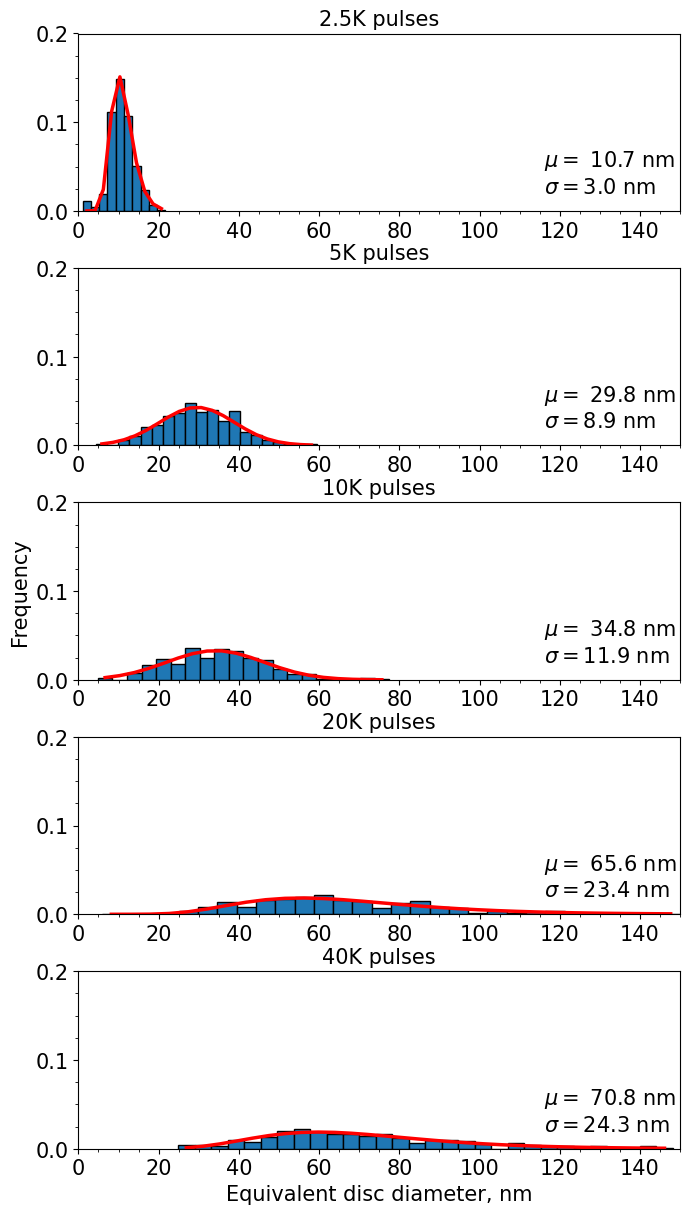

In [142]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize = [7,12])
fig.tight_layout(pad=2)

bins_coll = [10, 20 , 20, 30, 30]

for i in range(len(ax)):
    ax[i].set_xlim([0, 150])
    ax[i].set_ylim([0, 0.2])
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(20))
    ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(5))
    ax[i].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax[i].yaxis.set_minor_locator(ticker.MultipleLocator(0.025))
    ax[i].set_title(f'{ticks[i]} pulses', size = 15)
    ax[i].text(116, 0.05, rf'$\mu = $ {(data[i].mean(axis=0)):,.1f} nm', size = 15)
    ax[i].text(116, 0.02, r'$\sigma = $' + f'{(data[i].std(axis=0)):,.1f} nm', size = 15)
    ax[i].tick_params(axis='x', labelsize=15)
    ax[i].tick_params(axis='y', labelsize=15)
    
    counts, bins, _ = ax[i].hist(data[i], bins=bins_coll[i], density=True, edgecolor = 'black')
    bin_centers = (bins[1:] + bins[:-1]) / 2
    if i in [0,3,4]:
        popt, _ = curve_fit(log_norm, bin_centers, counts, p0=[0, 1])
        ax[i].plot(bin_centers, log_norm(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5)
    else:
        popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[0, 1])
        ax[i].plot(bin_centers, gaussian(bin_centers, *popt), color='red', label='Fitted curve', linewidth = 2.5) 

ax[2].set_ylabel('Frequency', size = 15)
ax[4].set_xlabel('Equivalent disc diameter, nm', size = 15)       

#plt.savefig('size_distr.png', bbox_inches = 'tight', dpi = 300)

Text(0, 0.5, 'Size, nm')

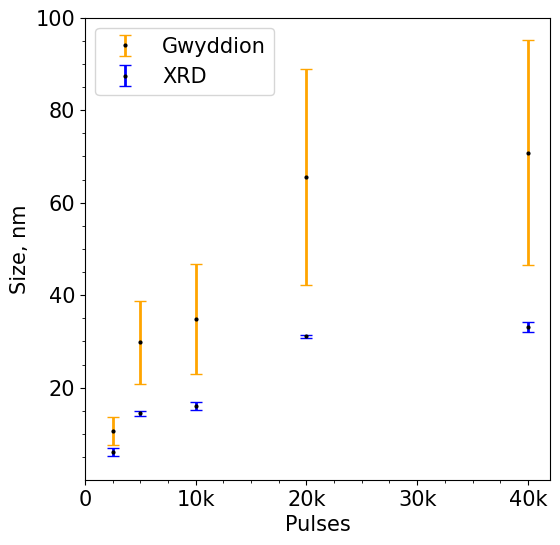

In [143]:
pulses = [2.5, 5, 10, 20, 40] 
mean = [i.mean(axis = 0) for i in data]
std = [i.std(axis = 0) for i in data]

grain_size = [6.12053282553503, 14.4675536535772, 16.0292041820779, 31.1088409009669, 33.1809412908201]
grain_error = [0.928467956187653, 0.555476698710558, 0.889212238718026, 0.392076368195673, 1.09016253724525]

#plt.boxplot(data, labels= ticks) 
#plt.scatter(pulses, grain_size, label = 'exp.')
#plt.scatter(pulses, mean, label = 'calc.')

fig, ax = plt.subplots(figsize = [6,6])


ax.errorbar(pulses, mean, yerr=std, color = 'black', ecolor = 'orange', fmt='o',  linewidth=2,  markersize=2, capsize=4, label = 'Gwyddion')
ax.errorbar(pulses, grain_size, yerr=grain_error,  color = 'black', ecolor = 'blue', fmt='o', markersize=2, linewidth=2, capsize=4, label = 'XRD')
ax.legend(loc = 'upper left', fontsize = 15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
#ax.set_title('pulses', size = 15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
x_ticks = [0, 10, 20, 30, 40]
ax.set_xticks(x_ticks, ['0', '10k', '20k', '30k', '40k'])
ax.set_xlim([0,42]) 
ax.set_ylim([0.1,100])
ax.set_xlabel('Pulses', size=15)
ax.set_ylabel('Size, nm', size=15)

#plt.savefig('size_comp.png', bbox_inches = 'tight', dpi = 300)

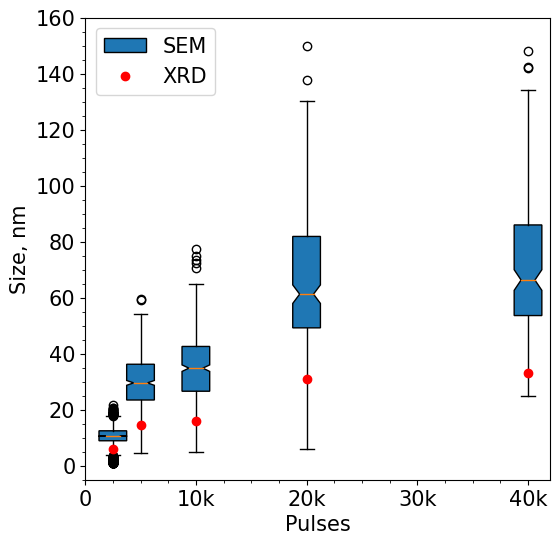

In [188]:
x_ticks = [2.5, 5, 10, 20, 40]
labels= ['SEM'] * 5
data = [df_25K, df_5K, df_10K, df_20K, df_40K]
fig, ax = plt.subplots(figsize = [6,6])
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

#ax.errorbar(x_ticks, grain_size, yerr=grain_error,  color = 'red', ecolor = 'red', fmt='o', markersize=3, linewidth=2, capsize=5, label = 'XRD')

#ax.boxplot(data, positions=x_ticks, widths=2.5, labels= labels)
box = ax.boxplot(df_25K, positions=[2.5], widths=2.5, notch=True, patch_artist=True)
ax.boxplot(df_5K, positions=[5], widths=2.5, notch=True, patch_artist=True)
ax.boxplot(df_10K, positions=[10], widths=2.5, notch=True, patch_artist=True)
ax.boxplot(df_20K, positions=[20], widths=2.5, notch=True, patch_artist=True)
ax.boxplot(df_40K, positions=[40], widths=2.5, notch=True, patch_artist=True)

line1, = ax.plot(x_ticks, grain_size, 'ro', label = 'XRD')
ax.set_xticklabels(['2.5k', '5k', '10k', '20k', '40k'])
ax.set_ylim([-5,160])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax.set_xticks([0, 10, 20, 30, 40], ['0', '10k', '20k', '30k', '40k'])
ax.set_xlabel('Pulses', size=15)
ax.set_ylabel('Size, nm', size=15)
ax.set_xlim([0, 42])
ax.legend([box["boxes"][0], line1], ['SEM','XRD'] , loc='upper left', prop={'size': 15})
#ax.legend(loc = 'upper left')
plt.savefig('size_comp.png', bbox_inches = 'tight', dpi = 300)